In [116]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter
import datetime
import glob
import os


ceiling = 6000
floor = 100
start = datetime.datetime(2017, 1, 1)
end = datetime.datetime(2023, 12, 31)


headers = ["Date", "Price", "Postcode","Ownership", "Type", "SaleType"]
files = ["RG30","RG314","RG315","RG316"]
df = pd.concat(
    (pd.read_csv(f"./{file}.csv", usecols=headers).assign(Source=file) for file in files), 
    ignore_index=True
)
# df = df[(df.Postcode.str.startswith("RG31"))]
df = df[(df.SaleType != "Non-standard")]
df = df[(df.Ownership == "Freehold")]
#df = df[(df.Type != "Terraced")]
#df = df[(df.Type != "Flat")]
#df = df[(df.Type == "Terraced")]
#df = df[(df#Type == "Flat") | (df.Type == "Detached") | (df.Type == "Semi-detached")]
#df = df[(df.Type == "Detached") | (df.Type == "Semi-detached")]
#df = df[(df.Type == "Semi-detached")]
#df = df[(df.Type == "Detached")]
df.Price = pd.to_numeric(df.Price).div(1000)

df = df[(df.Price < ceiling) & (df.Price > floor)]
df.Date = pd.to_datetime(df.Date, errors='coerce')
df = df[(df.Date > start) & (df.Date < end)]
df = df.sort_values(by=['Date'])
df.set_index('Date', inplace=True)

df30 = df[(df.Source == "RG30")]
df31 = df[(df.Source == "RG314") | (df.Source == "RG315") | (df.Source == "RG316")]
df315 = df[(df.Source == "RG315")]
df316 = df[(df.Source == "RG316")]



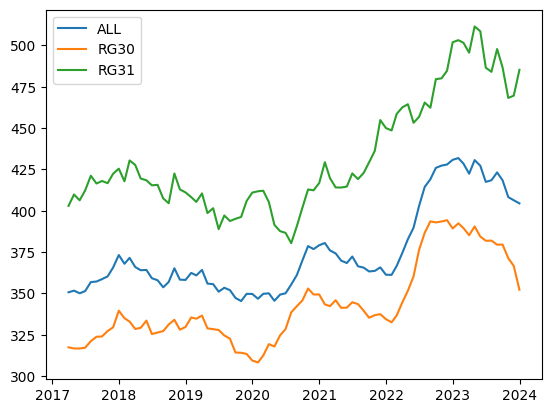

In [117]:
dfs = {
    "ALL" : df,
    "RG30": df30,
    "RG31" : df31
}

for key, data in dfs.items():
    #plt.plot(data.Price.rolling(window=50, min_periods=10, win_type='gaussian').mean(std=1000), label=key)
    plt.plot(data.Price.resample("ME").mean().rolling(window=6, min_periods=3).mean(), label=key)
    
plt.gca().xaxis.set_major_locator(YearLocator())
plt.legend()
plt.show()

In [118]:
monthly_counts = df[(df.Price > floor)].resample('ME').size()
monthly_counts_30 = df30[(df30.Price > floor)].resample('ME').size()
monthly_counts_31 = df31[(df31.Price > floor)].resample('ME').size()
monthly_counts_315 = df315[(df315.Price > floor)].resample('ME').size()
monthly_counts_316 = df316[(df316.Price > floor)].resample('ME').size()
print(monthly_counts.tail(36))

Date
2021-01-31     76
2021-02-28     71
2021-03-31    138
2021-04-30     69
2021-05-31     68
2021-06-30    166
2021-07-31     37
2021-08-31     47
2021-09-30    133
2021-10-31     44
2021-11-30     60
2021-12-31     43
2022-01-31     50
2022-02-28     63
2022-03-31     47
2022-04-30     50
2022-05-31     67
2022-06-30     50
2022-07-31     59
2022-08-31     79
2022-09-30     54
2022-10-31     73
2022-11-30     63
2022-12-31     56
2023-01-31     67
2023-02-28     49
2023-03-31     46
2023-04-30     34
2023-05-31     42
2023-06-30     37
2023-07-31     46
2023-08-31     47
2023-09-30     55
2023-10-31     24
2023-11-30     10
2023-12-31      5
Freq: ME, dtype: int64


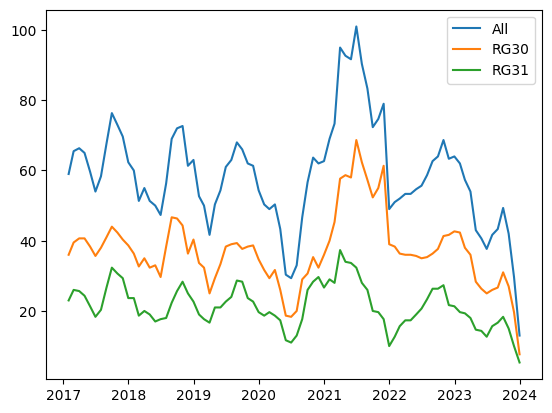

In [119]:
plt.plot(monthly_counts.rolling(window=3, min_periods=1).mean(), label="All")
plt.plot(monthly_counts_30.rolling(window=3, min_periods=1).mean(), label="RG30")
plt.plot(monthly_counts_31.rolling(window=3, min_periods=1).mean(), label="RG31")
#plt.plot(monthly_counts_315.rolling(window=6).mean(), label="RG315")
#plt.plot(monthly_counts_316.rolling(window=6).mean(), label="RG316")
plt.gca().xaxis.set_major_locator(YearLocator())
plt.legend()
plt.show()